In [6]:
#importing libraries
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow
import random
from keras.callbacks import EarlyStopping
from PIL import Image
import h5py
import os
import numpy as np
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
import shutil
from keras.callbacks import ModelCheckpoint
from keras import applications
from keras.models import Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import seaborn as sns
from keras.optimizers import SGD
import time
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import random
import pickle
import cv2
import tensorflow as tf
from tensorflow.python import keras
from keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Dropout, Flatten, Activation
from keras import models, optimizers
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import os, time
import random
import keras.initializers
from keras.initializers import glorot_uniform
from keras.utils import CustomObjectScope


In [9]:
#mount to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
#directories stuff
%cd /content/drive/MyDrive/Colab Notebooks
if not os.path.isdir("./wbc_stuff"):
  os.mkdir("./wbc_stuff")
else:
  pass

/content/drive/MyDrive/Colab Notebooks


In [ ]:
#Unrar data
!unrar x "./AugmentedData.rar" "./wbc_stuff"
!unrar x "./OriginalData.rar" "./wbc_stuff"

____!NOTE!____

__There are original data and augmneted data for training__

Run the corresponding cell for original data or augmneted data you want to train.  

In [ ]:
#load original data
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator=train_datagen.flow_from_directory('./wbc_stuff/OriginalData/train', target_size=(32, 32),color_mode="rgb",classes=None,class_mode="categorical",batch_size=32,shuffle=True)
val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator=val_datagen.flow_from_directory('./wbc_stuff/OriginalData/val', target_size=(32, 32),color_mode="rgb",classes=None,class_mode="categorical",batch_size=32,shuffle=False)

In [ ]:
#load augmented data

train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator=train_datagen.flow_from_directory('./wbc_stuff/AugmentedData/train', target_size=(32, 32),color_mode="rgb",classes=None,class_mode="categorical",batch_size=32,shuffle=True)
val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator=val_datagen.flow_from_directory('./wbc_stuff/AugmentedData/val', target_size=(32, 32),color_mode="rgb",classes=None,class_mode="categorical",batch_size=32,shuffle=False)

____!NOTE!____

Everytime you want to train the network you should run define model cell first.  

In [ ]:
#define model

n_epochs = 200
in_shape = (32,32,3)#X_train[0].shape
print(in_shape)
n_labels = 5
drop_out = 0.2
batch_size = 32
loss_fnc = 'categorical_crossentropy'
def build_nn(in_shape,n_labels):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(16, (3,3), padding='same', activation = 'relu',input_shape = in_shape))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(1,1)))
    model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1024,activation='relu'))
    model.add(tf.keras.layers.Dropout(drop_out))
    model.add(tf.keras.layers.Dense(n_labels,activation='softmax' ))
    return model

model = build_nn(in_shape,n_labels)
model.summary()
opt = tf.keras.optimizers.Adam(0.000087)
model.compile(loss = loss_fnc, optimizer = opt, metrics=['accuracy'])

In [49]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="./wbc_stuff/best_weights.h5",
                               monitor = 'val_accuracy',
                               verbose=1,
                               save_best_only=True)
if not os.path.isdir('./wbc_stuff/my_log_dir'):
  os.mkdir('./wbc_stuff/my_log_dir')
else:
  pass
LR_dec = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',factor=0.78,patience=7,min_lr=0.000000008)
tensorboardcallbacks=keras.callbacks.TensorBoard(log_dir='./wbc_stuff/my_log_dir',histogram_freq=1)
callbacks = [tensorboardcallbacks,LR_dec,checkpointer]



In [ ]:
#training
history = model.fit_generator(train_generator,epochs=200,verbose=1,validation_data=val_generator, callbacks=callbacks)
#model.save_weights("weights_final.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


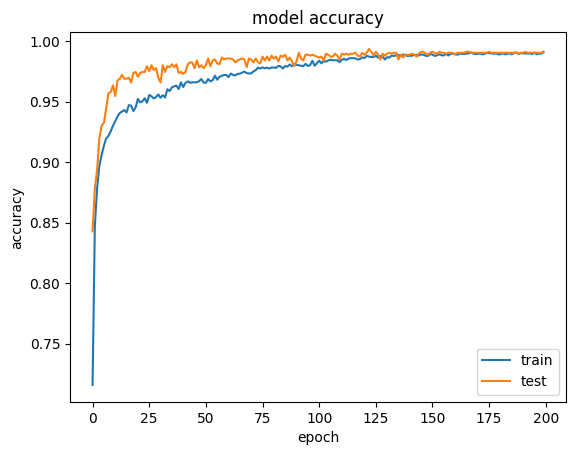

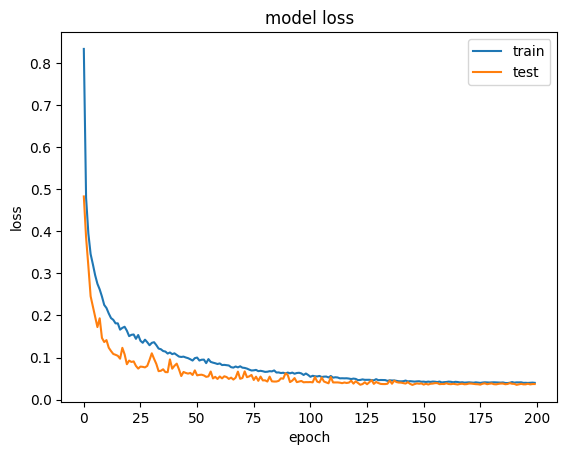

In [56]:
# plot accuracy and loss

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [57]:
cell_num = []

cell_num.append(len(os.listdir('./wbc_stuff/AugmentedData/val/bas/')))
cell_num.append(len(os.listdir('./wbc_stuff/AugmentedData/val/eso/')))
cell_num.append(len(os.listdir('./wbc_stuff/AugmentedData/val/lam/')))
cell_num.append(len(os.listdir('./wbc_stuff/AugmentedData/val/mono/')))
cell_num.append(len(os.listdir('./wbc_stuff/AugmentedData/val/neu/')))

In [58]:
#data validation label matrise
val_class=[]

for i in range(cell_num[0]):
  val_class.append(0)
for i in range(cell_num[1]):
  val_class.append(1)
for i in range(cell_num[2]):
  val_class.append(2)
for i in range(cell_num[3]):
  val_class.append(3)
for i in range(cell_num[4]):
  val_class.append(4)

y_inc=model.predict_generator(val_generator)
ytest=np.argmax(y_inc,axis=1)

<ipython-input-58-c4dddef7a617>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_inc=model.predict_generator(val_generator)


In [59]:
#validation_class_accuracy
j = 0
val_class_accuracy = []
for i in range(5):
  print(j,j+cell_num[i])
  t = val_class[j:j+cell_num[i]]
  y = ytest[j:j+cell_num[i]]
  j+=cell_num[i]
  acc = accuracy_score(y,t)
  val_class_accuracy.append(acc)

print("accuracy of bas: ",val_class_accuracy[0])
print("accuracy of eso: ",val_class_accuracy[1])
print("accuracy of lam: ",val_class_accuracy[2])
print("accuracy of mono: ",val_class_accuracy[3])
print("accuracy of neu: ",val_class_accuracy[4])

0 4
4 30
30 521
521 666
666 1260
accuracy of bas:  1.0
accuracy of eso:  0.9615384615384616
accuracy of lam:  0.9918533604887984
accuracy of mono:  0.9793103448275862
accuracy of neu:  0.9932659932659933
